

# Exercise
#### Create a time series data on a monthly basis starting from April 2007 to March 2012 considering random numbers as values with seed value as 42.

In [30]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline # to print the plot in same line in jupiterNotebook
from statsmodels.tsa.seasonal import seasonal_decompose


UsageError: unrecognized arguments: # to print the plot in same line in jupiterNotebook


In [58]:
import pandas as pd
import numpy as np

# Set the seed value for reproducibility
np.random.seed(42)

# Define the date range from April 2007 to March 2012
date_range = pd.date_range(start="2007-04-01", end="2012-03-01", freq="M")

# Generate random values for each month in the date range
values = np.random.rand(len(date_range))

# Create a DataFrame with date as the index and random values as the data
time_series_data = pd.DataFrame({"Value": values}, index=date_range)

# Print the first few rows of the generated time series data
print(time_series_data.head())

               Value
2007-04-30  0.374540
2007-05-31  0.950714
2007-06-30  0.731994
2007-07-31  0.598658
2007-08-31  0.156019


In [59]:

# Generating 10 random values
np.random.seed(42)
val = np.arange(500)
np.random.shuffle(val)
val = val[:10]
val

array([361,  73, 374, 155, 104, 394, 377, 124,  68, 450])

In [60]:

#creating dataframe with dummy values
dummy_ = pd.DataFrame(val, index=pd.date_range(start='1/1/1910', end='1/10/1910', freq='D'), 
                      # DateOffset 'D' refers to daily 
                      columns=['RandomData'])
dummy_

,RandomData
1910-01-01,361
1910-01-02,73
1910-01-03,374
1910-01-04,155
1910-01-05,104
1910-01-06,394
1910-01-07,377
1910-01-08,124
1910-01-09,68
1910-01-10,450


In [61]:
# Converting an unsorted date into a sorted date:  
# generating unordered index
idx_ = np.arange(10) 
np.random.shuffle(idx_)
date = pd.date_range(start='1/1/1910', end='1/10/1910', freq='D')
unordered_data = pd.DataFrame(val, index=date[idx_], columns=['Random data'])
unordered_data

,Random data
1910-01-09,361
1910-01-02,73
1910-01-10,374
1910-01-06,155
1910-01-04,104
1910-01-07,394
1910-01-05,377
1910-01-08,124
1910-01-01,68
1910-01-03,450


In [62]:
# sorting dataframe based on date index
unordered_data.sort_index(inplace=True)
unordered_data

,Random data
1910-01-01,68
1910-01-02,73
1910-01-03,450
1910-01-04,104
1910-01-05,377
1910-01-06,155
1910-01-07,394
1910-01-08,124
1910-01-09,361
1910-01-10,374


In [63]:
# Summary of the data
unordered_data.describe().T
#unordered_data.dtypes


,count,mean,std,min,25%,50%,75%,max
Random data,10.0,248.0,154.629306,68.0,109.0,258.0,376.25,450.0


## Appliances


In [29]:
Appliance = pd.read_csv('Appliance.csv', parse_dates=[0]) # converts or changes the data of the first column into dateTime format
print(Appliance)

                     date  Appliances
0     2016-01-11 17:00:00          60
1     2016-01-11 17:10:00          60
2     2016-01-11 17:20:00          50
3     2016-01-11 17:30:00          50
4     2016-01-11 17:40:00          60
...                   ...         ...
19730 2016-05-27 17:20:00         100
19731 2016-05-27 17:30:00          90
19732 2016-05-27 17:40:00         270
19733 2016-05-27 17:50:00         420
19734 2016-05-27 18:00:00         430

[19735 rows x 2 columns]


In [31]:
# Summary of the data
Appliance.describe().T
Appliance.dtypes

date          datetime64[ns]
Appliances             int64
dtype: object

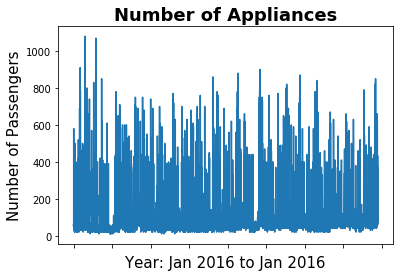

In [94]:
year = Appliance['date'].dt.year  # extracting year from the travel data
# Visualizing the time series by plotting number of passengers versus time
fig, ax = plt.subplots()
ax.plot(Appliance.Appliances)
ax.set_title('Number of Appliances', weight='bold', fontsize=18) # Title
ax.set_ylabel('Number of Passengers', fontsize=15)
ax.set_xlabel('Year: Jan 2016 to Jan 2016', fontsize=15)
ax.set_xticklabels(np.unique(year))
fig.show()

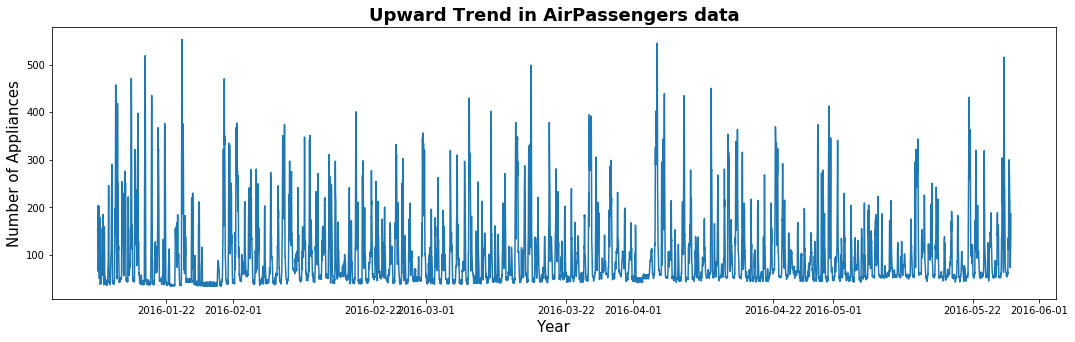

In [83]:
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Another way to load a time series data by defining a date format
dateparse = lambda dates: pd.datetime.strptime(dates, "%m/%d/%Y %H:%M")
Appliance = pd.read_csv('Appliance.csv', index_col='date', date_parser=dateparse)

#mymod = freq=decompfreq
myModel = seasonal_decompose(Appliance, freq=10)
# print(myModel)

#Visualizing trend of Airpassengers data
plt.figure(figsize=(18, 5))

# Plot original data

plt.plot(myModel.trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Appliances', fontsize=15)
plt.title('Upward Trend in AirPassengers data', weight='bold', fontsize=18)
plt.show()

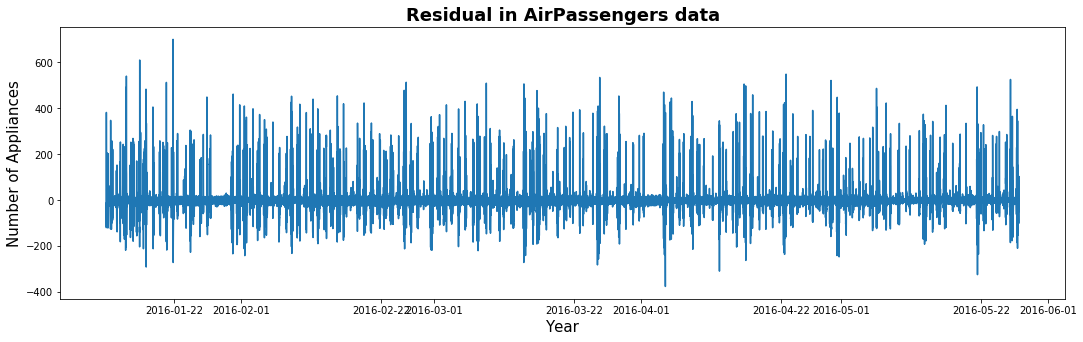

In [84]:
plt.figure(figsize=(18, 5))
plt.plot(myModel.resid)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Appliances', fontsize=15)
plt.title('Residual in AirPassengers data', weight='bold', fontsize=18)
plt.show()

# Decomposation Model

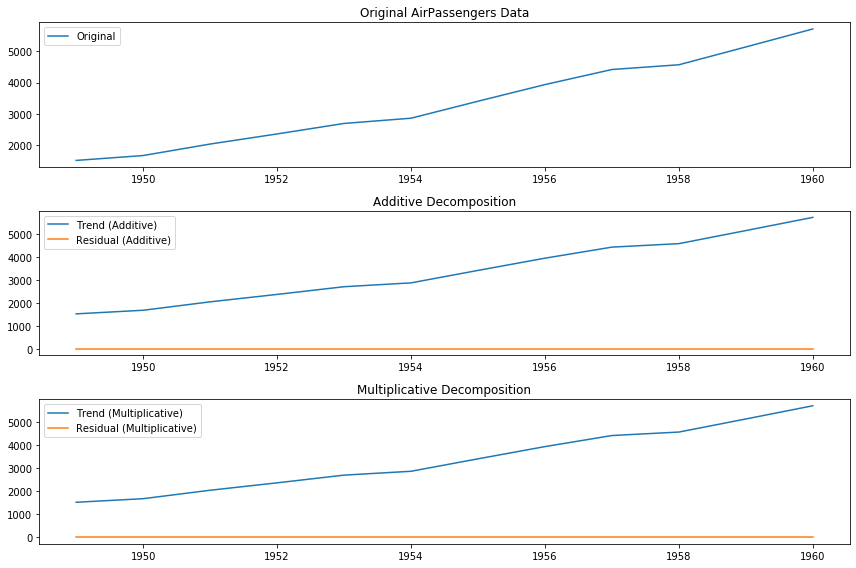

In [9]:

# Read the AirPassengers data
AirPassengers = pd.read_csv('AirPassengers.csv', parse_dates=['Travel date'], index_col='Travel date')

# Resample the data to 'AS-JAN' frequency (Annual, starting in January)
AirPassengers_BAS_JAN = AirPassengers.resample('AS-JAN').sum()

# Decompose the time series into additive and multiplicative components
result_additive = seasonal_decompose(AirPassengers_BAS_JAN['Passengers'], model='additive', extrapolate_trend='freq')
result_multiplicative = seasonal_decompose(AirPassengers_BAS_JAN['Passengers'], model='multiplicative', extrapolate_trend='freq')

# Plot the original and deseasonalized values
plt.figure(figsize=(12, 8))

# Plot original data
plt.subplot(3, 1, 1)
plt.plot(AirPassengers_BAS_JAN['Passengers'], label='Original')
plt.title('Original AirPassengers Data')
plt.legend()

# Plot additive decomposition
plt.subplot(3, 1, 2)
plt.plot(result_additive.trend, label='Trend (Additive)')
plt.plot(result_additive.resid, label='Residual (Additive)')
plt.title('Additive Decomposition')
plt.legend()

# Plot multiplicative decomposition
plt.subplot(3, 1, 3)
plt.plot(result_multiplicative.trend, label='Trend (Multiplicative)')
plt.plot(result_multiplicative.resid, label='Residual (Multiplicative)')
plt.title('Multiplicative Decomposition')
plt.legend()

plt.tight_layout()
plt.show()


### For the following time series, you are given the moving average forecast. Compute the mean squared error.

In [118]:
mydata = pd.read_csv('Exercise-3.csv')
mydata

,Time Period,Time series Value,Moving Average Forecast
0,1,23,NaN
1,2,17,NaN
2,3,17,NaN
3,4,26,19.0
4,5,11,20.0
5,6,23,18.0
6,7,17,20.0


In [119]:
from sklearn.metrics import mean_squared_error


In [121]:
data ={
    'TimePeriod': [1,2,3,4,5,6,7],
    'TimeSeriesValue': [23,17,17,26,11,23,17],
    'Forecast': [None,None,None, 19.0,20.0,18.0,20.0]
}
df = pd.DataFrame(data)
df

,TimePeriod,TimeSeriesValue,Forecast
0,1,23,NaN
1,2,17,NaN
2,3,17,NaN
3,4,26,19.0
4,5,11,20.0
5,6,23,18.0
6,7,17,20.0


In [123]:
#  dropping the rows that has NaN value
df = df.dropna(subset=['Forecast'])

In [125]:
# Calculate MSE

mean_squared_error(df['TimeSeriesValue'], df['Forecast'])

41.0

## Hsales

In [11]:
# Hsales = pd.read_csv('hsales.csv', parse_dates=[0]) # converts or changes the data of the first column into dateTime format
# print(Hsales)

# Reading data
dateparse1 = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
Hsales = pd.read_csv('hsales.csv', index_col='date', date_parser=dateparse1)
print(Hsales)
#Hsales.head(30)

            hsales
date              
1973-01-01      55
1973-02-01      60
1973-03-01      68
1973-04-01      63
1973-05-01      65
...            ...
1995-07-01      64
1995-08-01      63
1995-09-01      55
1995-10-01      54
1995-11-01      44

[275 rows x 1 columns]


In [27]:
# Summary of the data
Hsales.describe().T
Hsales.dtypes

hsales    int64
dtype: object

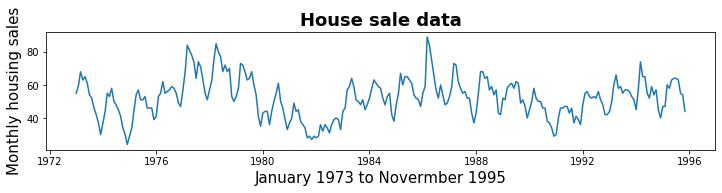

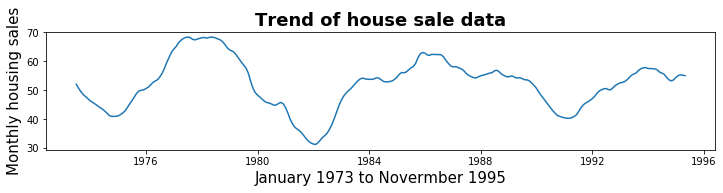

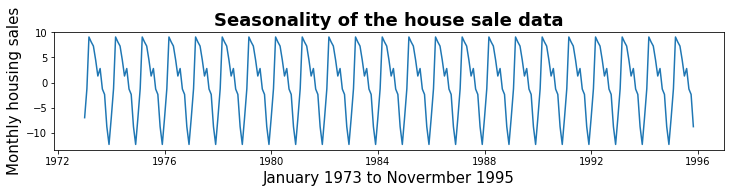

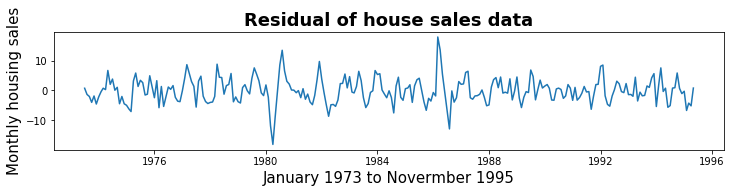

In [13]:
# Visualizing house sales data
# Plot the original and deseasonalized values
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(Hsales)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('House sale data', weight='bold', fontsize=18)
plt.show()

# Visualizing monthly sales of new one-family houses
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 2)
plt.plot(seasonal_decompose(Hsales).trend)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('Trend of house sale data', weight='bold', fontsize=18)
plt.show()

# Visualizing monthly sales of new one-family houses
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 3)
plt.plot(seasonal_decompose(Hsales).seasonal)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('Seasonality of the house sale data', weight='bold', fontsize=18)
plt.show()

# Visualizing residuals of house sales data
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 4)
plt.plot(seasonal_decompose(Hsales).resid)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('Residual of house sales data', weight='bold', fontsize=18)
plt.show()


In [14]:
# there is the incomplete data for the last year i.e 1995 so deleting the entire data of 1995 
Hsale_trimed = Hsales.iloc[:-11]
Hsale_trimed

,hsales
date,
1973-01-01,55
1973-02-01,60
1973-03-01,68
1973-04-01,63
1973-05-01,65
...,...
1994-08-01,59
1994-09-01,54
1994-10-01,57


In [15]:
#Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Hs_reshaped = pd.DataFrame(Hsale_trimed.values.reshape(22, 12), 
                         columns=cols,                        # Month 
                         index=range(1973, 1995))             # Year
Hs_reshaped


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,55,60,68,63,65,61,54,52,46,42,37,30
1974,37,44,55,53,58,50,48,45,41,34,30,24
1975,29,34,44,54,57,51,51,53,46,46,46,39
1976,41,53,55,62,55,56,57,59,58,55,49,47
1977,57,68,84,81,78,74,64,74,71,63,55,51
1978,57,63,75,85,80,77,68,72,68,70,53,50
1979,53,58,73,72,68,63,64,68,60,54,41,35
1980,43,44,44,36,44,50,55,61,50,46,39,33
1981,37,40,49,44,45,38,36,34,28,29,27,29
1982,28,29,36,32,36,34,31,36,39,40,39,33


In [16]:
## the decomposition of Hsales data on yearly basis by using additive model.
Hsales_data_add = np.round(seasonal_decompose(Hsale_trimed, model='additive').seasonal, 2)
# Getting output corresponding to each month
Hs_season_add = pd.DataFrame(Hsales_data_add.values.reshape(22, 12), 
                         columns=cols,                        # Month 
                         index=range(1973, 1995))             # Year
Hs_season_add 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1974,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1975,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1976,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1977,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1978,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1979,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1980,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1981,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36
1982,-7.05,-0.97,9.24,8.29,7.2,4.45,1.49,2.71,-1.4,-2.7,-8.89,-12.36


In [17]:
#Calculate the average number of passengers traveling each year.
Hs = Hs_reshaped.iloc[:21, :].copy()
# Finding average yearly
Hs_yearly_mean = Hs.mean(axis=1)
Hs_yearly_mean

1973    52.750000
1974    43.250000
1975    45.833333
1976    53.916667
1977    68.333333
1978    68.166667
1979    59.083333
1980    45.416667
1981    36.333333
1982    34.416667
1983    51.833333
1984    53.250000
1985    57.333333
1986    62.333333
1987    56.000000
1988    56.250000
1989    54.166667
1990    44.583333
1991    41.500000
1992    50.666667
1993    55.500000
dtype: float64

In [18]:
# Dividing with mean values
Hs_month_avg = Hs.div(Hs_yearly_mean.values, axis=0)
Hs_month_avg


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,1.042654,1.137441,1.289100,1.194313,1.232227,1.156398,1.023697,0.985782,0.872038,0.796209,0.701422,0.568720
1974,0.855491,1.017341,1.271676,1.225434,1.341040,1.156069,1.109827,1.040462,0.947977,0.786127,0.693642,0.554913
1975,0.632727,0.741818,0.960000,1.178182,1.243636,1.112727,1.112727,1.156364,1.003636,1.003636,1.003636,0.850909
1976,0.760433,0.982998,1.020093,1.149923,1.020093,1.038640,1.057187,1.094281,1.075734,1.020093,0.908810,0.871716
1977,0.834146,0.995122,1.229268,1.185366,1.141463,1.082927,0.936585,1.082927,1.039024,0.921951,0.804878,0.746341
1978,0.836186,0.924205,1.100244,1.246944,1.173594,1.129584,0.997555,1.056235,0.997555,1.026895,0.777506,0.733496
1979,0.897038,0.981664,1.235543,1.218618,1.150917,1.066291,1.083216,1.150917,1.015515,0.913963,0.693935,0.592384
1980,0.946789,0.968807,0.968807,0.792661,0.968807,1.100917,1.211009,1.343119,1.100917,1.012844,0.858716,0.726606
1981,1.018349,1.100917,1.348624,1.211009,1.238532,1.045872,0.990826,0.935780,0.770642,0.798165,0.743119,0.798165
1982,0.813559,0.842615,1.046005,0.929782,1.046005,0.987893,0.900726,1.046005,1.133172,1.162228,1.133172,0.958838


In [19]:
# Finding monthly average
Hs_SI = Hs_month_avg.mean(axis=0)
Hs_SI

Jan    0.872648
Feb    0.981909
Mar    1.167976
Apr    1.148689
May    1.139639
Jun    1.091548
Jul    1.029638
Aug    1.052554
Sep    0.969175
Oct    0.947136
Nov    0.834362
Dec    0.764727
dtype: float64

In [20]:
# Deseasonalized data
Hs_deseasonalized = Hs_reshaped - Hs_SI
Hs_deseasonalized

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,54.127352,59.018091,66.832024,61.851311,63.860361,59.908452,52.970362,50.947446,45.030825,41.052864,36.165638,29.235273
1974,36.127352,43.018091,53.832024,51.851311,56.860361,48.908452,46.970362,43.947446,40.030825,33.052864,29.165638,23.235273
1975,28.127352,33.018091,42.832024,52.851311,55.860361,49.908452,49.970362,51.947446,45.030825,45.052864,45.165638,38.235273
1976,40.127352,52.018091,53.832024,60.851311,53.860361,54.908452,55.970362,57.947446,57.030825,54.052864,48.165638,46.235273
1977,56.127352,67.018091,82.832024,79.851311,76.860361,72.908452,62.970362,72.947446,70.030825,62.052864,54.165638,50.235273
1978,56.127352,62.018091,73.832024,83.851311,78.860361,75.908452,66.970362,70.947446,67.030825,69.052864,52.165638,49.235273
1979,52.127352,57.018091,71.832024,70.851311,66.860361,61.908452,62.970362,66.947446,59.030825,53.052864,40.165638,34.235273
1980,42.127352,43.018091,42.832024,34.851311,42.860361,48.908452,53.970362,59.947446,49.030825,45.052864,38.165638,32.235273
1981,36.127352,39.018091,47.832024,42.851311,43.860361,36.908452,34.970362,32.947446,27.030825,28.052864,26.165638,28.235273
1982,27.127352,28.018091,34.832024,30.851311,34.860361,32.908452,29.970362,34.947446,38.030825,39.052864,38.165638,32.235273


In [26]:
# Importing libraries
import numpy as np
import pandas as pd
# Reading data
Hs_1D = pd.DataFrame(Hs_deseasonalized.values.reshape(22, 12), columns=['value'])
# Building Linear Regression model and predicting trend values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(1, 275).reshape(22, 12), Hs_1D.value.values.reshape(22, 12) )
pred = pd.DataFrame(model.predict(np.arange(1, 12).reshape((22, 12)), columns=['Trend values'], index=cols)
pred['Regression equations'] = pred['Trend values'].apply(lambda x: f"{np.round(model.coef_[0][0], 2)} * {np.round(x, 2)} + {np.round(model.intercept_[0], 2)}")
pred

SyntaxError: invalid syntax (<ipython-input-26-83ce27534a28>, line 11)